<div style="background: #000;
            color: #FFF;
            margin: 0px;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Week 30 Class 2</h1> 
    <h3>04/27/21</h3>
</div>

## Objectives for this week:
* K-Means Clustering
* SQL Joins
* Django Models

## Todays Agenda
* Django Models

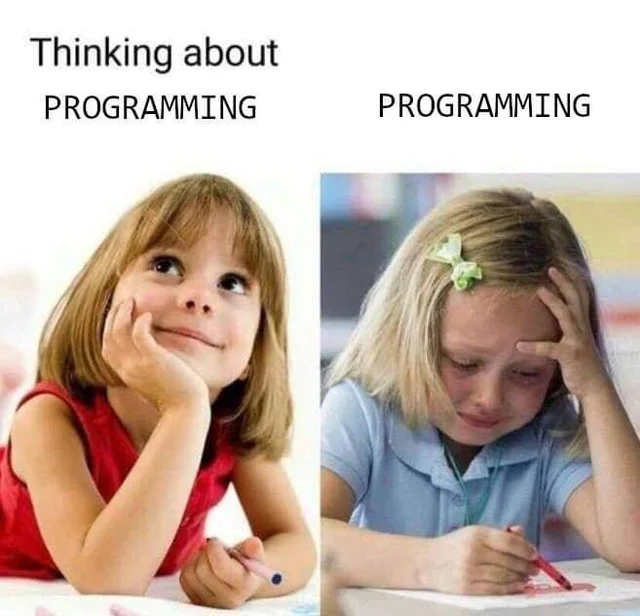


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Homework Presentation</h1> 
</div>

# Exercise 2

Write a SQL query to **delete** all duplicate email entries in a table named `Person`, keeping only unique emails based on its *smallest* *Id*.

```
+----+------------------+
| Id | Email            |
+----+------------------+
| 1  | john@example.com |
| 2  | bob@example.com  |
| 3  | john@example.com |
+----+------------------+
Id is the primary key column for this table.
```

For example, after running your query, the above `Person` table should have the following rows:

```
+----+------------------+
| Id | Email            |
+----+------------------+
| 1  | john@example.com |
| 2  | bob@example.com  |
+----+------------------+
```

Note:
Your output is the whole `Person` table after executing your sql. Use `delete` statement. 

Also note, due to inconsistencies between `mysql` and `sqlite3`, solutions may differ depending on sql database. We're looking for an `sqlite3` solution (while leetcode requires a `mysql` solution).




In [ ]:
import sqlite3

sql_commands = \
"""
DROP TABLE IF EXISTS Person;

CREATE TABLE Person (
 Id INTEGER NOT NULL,
 Email TEXT NOT NULL
);

INSERT into Person (Id, Email) values ('1', 'john@example.com');
INSERT into Person (Id, Email) values ('2', 'bob@example.com');
INSERT into Person (Id, Email) values ('3', 'john@example.com');
"""

db = sqlite3.connect('week-29-homework.db')
cursor = db.cursor()
cursor.executescript(sql_commands)
db.commit()
db.close()

In [ ]:
# use this function for your answers.
def with_conn(statement):
    conn = sqlite3.connect('week-29-homework.db')
    with conn:
        cur = conn.cursor()
        cur.execute(statement)
        result = cur.fetchall()
        return result

In [ ]:
with_conn("SELECT min(id) FROM Person GROUP BY Email")

In [ ]:
with_conn('DELETE FROM Person WHERE id NOT IN (SELECT min(id) FROM Person GROUP BY email);')

In [ ]:
with_conn('DELETE FROM Person WHERE id NOT IN (SELECT id FROM Person GROUP BY Email)')

In [ ]:
with_conn('SELECT * FROM Person;')

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Database Migration</h1> 
</div>

Say we had a table `Person` that contained two columns: `name` and `age`. We set up an sqlite database with this table and begin to add people to the table. We end up with 500 people in our database when we realize we'd like to add `email` to our table. 

If we add a new column, we end up with some issues. The biggest being that the 500 existing users of our database do not have emails. We need a way to update our table to include our new column, reconcile the old entries that are missing the new column, and transition our code to using the new version of the table with email column. 

Django provides code that handles this process for us. The automated process of reconciling database changes are called database migrations. We're migrating the database from the old version to the new version and taking our data with us. Django detects when we make changes to our tables and can set up our migrations and then allow us to migrate when we're ready.

To detect changes and set up pending migrations:
```bash
python manage.py makemigrations
```

To actually perform the migration:
```bash
python manage.py migrate
```

If you're in the directory for any of your current django projects, we haven't set up our database yet. We can do so by running `python manage.py migrate` in order to run our pending migrations (by default, django sets up some tables on its own and those migrations are pending). 

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Setting up our database for django</h1> 
</div>

By default, our database engine for django will be `sqlite3` and the `db.sqlite3` file will be placed in our base directory.

We will be switching to postgresql soon. Look it up.

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Django Models</h1> 
</div>

**Models**

A django model is the single, definitive source of information about your data. It contains the essential fields and behaviors of the data you’re storing. Generally, each model maps to a single database table.

The basics:
* Each model is a Python class that subclasses `django.db.models.Model` ([docs](https://docs.djangoproject.com/en/3.2/ref/models/instances/#django.db.models.Model)).
* Each attribute of the model represents a database field.
* With all of this, Django gives you an automatically-generated database-access API; see [Making queries](https://docs.djangoproject.com/en/3.2/topics/db/queries/).

Quick example

This example model defines a `Person`, which has a `first_name` and `last_name`:

```python
from django.db import models

class Person(models.Model):
    first_name = models.CharField(max_length=30)
    last_name = models.CharField(max_length=30)
```

`first_name` and `last_name` are [fields](https://docs.djangoproject.com/en/3.2/topics/db/models/#fields) of the model. Each field is specified as a class attribute, and each attribute maps to a database column.

The above Person model would create a database table like this:
```
CREATE TABLE myapp_person (
    "id" serial NOT NULL PRIMARY KEY,
    "first_name" varchar(30) NOT NULL,
    "last_name" varchar(30) NOT NULL
);
```
Some technical notes:
* The name of the table, `myapp_person`, is automatically derived from some model metadata but can be overridden. See [Table names](https://docs.djangoproject.com/en/3.2/ref/models/options/#table-names) for more details.
* An `id` field is added automatically, but this behavior can be overridden. See [Automatic primary key fields](https://docs.djangoproject.com/en/3.2/topics/db/models/#automatic-primary-key-fields).
* The `CREATE TABLE` SQL in this example is formatted using PostgreSQL syntax, but it’s worth noting Django uses SQL tailored to the database backend specified in your [settings file](https://docs.djangoproject.com/en/3.2/topics/settings/).

### Using models

Once you have defined your models, you need to tell Django you’re going to use those models. Do this by editing your settings file and changing the [`INSTALLED_APPS`](https://docs.djangoproject.com/en/3.2/ref/settings/#std:setting-INSTALLED_APPS) setting to add the name of the module that contains your `models.py`.

For example, if the models for your application live in the module `myapp.models` (the package structure that is created for an application by the [`manage.py startapp`](https://docs.djangoproject.com/en/3.2/ref/django-admin/#django-admin-startapp) script), [`INSTALLED_APPS`](https://docs.djangoproject.com/en/3.2/ref/settings/#std:setting-INSTALLED_APPS) should read, in part:

```python
INSTALLED_APPS = [
    #...
    'myapp',
    #...
]
```

When you add new apps to [`INSTALLED_APPS`](https://docs.djangoproject.com/en/3.2/ref/settings/#std:setting-INSTALLED_APPS), be sure to run `manage.py migrate`, optionally making migrations for them first with `manage.py makemigrations`.

### Fields

The most important part of a model – and the only required part of a model – is the list of database fields it defines. Fields are specified by class attributes. Be careful not to choose field names that conflict with the models API like clean, save, or delete.

Example:

```python
from django.db import models

class Musician(models.Model):
    first_name = models.CharField(max_length=50)
    last_name = models.CharField(max_length=50)
    instrument = models.CharField(max_length=100)

class Album(models.Model):
    artist = models.ForeignKey(Musician, on_delete=models.CASCADE)
    name = models.CharField(max_length=100)
    release_date = models.DateField()
    num_stars = models.IntegerField()
```

### Field types

Each field in your model should be an instance of the appropriate Field class. Django uses the field class types to determine a few things:
* The column type, which tells the database what kind of data to store (e.g. `INTEGER`, `VARCHAR`, `TEXT`).
* The default HTML widget to use when rendering a form field (e.g. `<input type="text">`, `<select>`).
* The minimal validation requirements, used in Django’s admin and in automatically-generated forms.

Django ships with dozens of built-in field types; you can find the complete list in the [model field reference](https://docs.djangoproject.com/en/3.2/ref/models/fields/#model-field-types). You can easily write your own fields if Django’s built-in ones don’t do the trick; see [Writing custom model fields](https://docs.djangoproject.com/en/3.2/howto/custom-model-fields/).


### Field options

Each field takes a certain set of field-specific arguments (documented in the [model field reference](https://docs.djangoproject.com/en/3.2/ref/models/fields/#model-field-types)). For example, [`CharField`](https://docs.djangoproject.com/en/3.2/ref/models/fields/#django.db.models.CharField) (and its subclasses) require a [`max_length`](https://docs.djangoproject.com/en/3.2/ref/models/fields/#django.db.models.CharField.max_length) argument which specifies the size of the `VARCHAR` database field used to store the data.

There’s also a set of common arguments available to all field types. All are optional. They’re fully explained in the [`reference`](https://docs.djangoproject.com/en/3.2/ref/models/fields/#common-model-field-options), but here’s a quick summary of the most often-used ones:

**[`null`](https://docs.djangoproject.com/en/3.2/ref/models/fields/#django.db.models.Field.null)**  
If `True`, Django will store empty values as `NULL` in the database. Default is `False`.

**[`blank`](https://docs.djangoproject.com/en/3.2/ref/models/fields/#django.db.models.Field.blank)**  
If `True`, the field is allowed to be blank. Default is `False`.

Note that this is different than `null`. `null` is purely database-related, whereas blank is validation-related. If a field has `blank=True`, form validation will allow entry of an empty value. If a field has `blank=False`, the field will be required.

**[`choices`](https://docs.djangoproject.com/en/3.2/ref/models/fields/#django.db.models.Field.choices)**  
A [sequence](https://docs.python.org/3/glossary.html#term-sequence) of 2-tuples to use as choices for this field. If this is given, the default form widget will be a select box instead of the standard text field and will limit choices to the choices given.

A choices list looks like this:

```python
    YEAR_IN_SCHOOL_CHOICES = [
        ('FR', 'Freshman'),
        ('SO', 'Sophomore'),
        ('JR', 'Junior'),
        ('SR', 'Senior'),
        ('GR', 'Graduate'),
    ]
```
Note: A new migration is created each time the order of choices changes.

The first element in each tuple is the value that will be stored in the database. The second element is displayed by the field’s form widget.

Given a model instance, the display value for a field with **choices** can be accessed using the `get_FOO_display()` method. For example:

```python
from django.db import models

class Person(models.Model):
    SHIRT_SIZES = (
        ('S', 'Small'),
        ('M', 'Medium'),
        ('L', 'Large'),
    )
    name = models.CharField(max_length=60)
    shirt_size = models.CharField(max_length=1, choices=SHIRT_SIZES)
```
```bash
>>> p = Person(name="Fred Flintstone", shirt_size="L")
>>> p.save()
>>> p.shirt_size
'L'
>>> p.get_shirt_size_display()
    'Large'
```

You can also use enumeration classes to define choices in a concise way:
```python
from django.db import models

class Runner(models.Model):
    MedalType = models.TextChoices('MedalType', 'GOLD SILVER BRONZE')
    name = models.CharField(max_length=60)
    medal = models.CharField(blank=True, choices=MedalType.choices, max_length=10)
```

Further examples are available in the model field reference.

**[`default`](https://docs.djangoproject.com/en/3.2/ref/models/fields/#django.db.models.Field.default)**
The default value for the field. This can be a value or a callable object. If callable it will be called every time a new object is created.

**[`help_text`](https://docs.djangoproject.com/en/3.2/ref/models/fields/#django.db.models.Field.help_text)**
Extra “help” text to be displayed with the form widget. It’s useful for documentation even if your field isn’t used on a form.

**[`primary_key`](https://docs.djangoproject.com/en/3.2/ref/models/fields/#django.db.models.Field.primary_key)**
If `True`, this field is the primary key for the model.

If you don’t specify `primary_key=True` for any fields in your model, Django will automatically add an [`IntegerField`](https://docs.djangoproject.com/en/3.2/ref/models/fields/#django.db.models.Field.primary_key) to hold the primary key, so you don’t need to set `primary_key=True` on any of your fields unless you want to override the default primary-key behavior. For more, see [Automatic primary key fields](https://docs.djangoproject.com/en/3.2/topics/db/models/#automatic-primary-key-fields).

The primary key field is read-only. If you change the value of the primary key on an existing object and then save it, a new object will be created alongside the old one. For example:

```python
from django.db import models

class Fruit(models.Model):
    name = models.CharField(max_length=100, primary_key=True)
```
```bash
>>> fruit = Fruit.objects.create(name='Apple')
>>> fruit.name = 'Pear'
>>> fruit.save()
>>> Fruit.objects.values_list('name', flat=True)
<QuerySet ['Apple', 'Pear']>
```
**[`unique`](https://docs.djangoproject.com/en/3.2/ref/models/fields/#django.db.models.Field.unique)**  
If `True`, this field must be unique throughout the table.

Again, these are just short descriptions of the most common field options. Full details can be found in the [common model field option reference](https://docs.djangoproject.com/en/3.2/ref/models/fields/#common-model-field-options).


### Automatic primary key fields

By default, Django gives each model an auto-incrementing primary key with the type specified per app in `AppConfig.default_auto_field` or globally in the `DEFAULT_AUTO_FIELD` setting. For example:

```python
id = models.BigAutoField(primary_key=True)
```

If you’d like to specify a custom primary key, specify `primary_key=True` on one of your fields. If Django sees you’ve explicitly set `Field.primary_key`, it won’t add the automatic `id` column.

Each model requires exactly one field to have `primary_key=True` (either explicitly declared or automatically added).

### Verbose field names¶

Each field type, except for `ForeignKey`, `ManyToManyField` and `OneToOneField`, takes an optional first positional argument – a verbose name. If the verbose name isn’t given, Django will automatically create it using the field’s attribute name, converting underscores to spaces.

In this example, the verbose name is "person's first name":
```python
first_name = models.CharField("person's first name", max_length=30)
```
In this example, the verbose name is "first name":
```python
first_name = models.CharField(max_length=30)
```
`ForeignKey`, `ManyToManyField` and `OneToOneField` require the first argument to be a model class, so use the verbose_name keyword argument:
```python
poll = models.ForeignKey(
    Poll,
    on_delete=models.CASCADE,
    verbose_name="the related poll",
)
sites = models.ManyToManyField(Site, verbose_name="list of sites")
place = models.OneToOneField(
    Place,
    on_delete=models.CASCADE,
    verbose_name="related place",
)
```
The convention is not to capitalize the first letter of the verbose_name. Django will automatically capitalize the first letter where it needs to.


### Relationships

Clearly, the power of relational databases lies in relating tables to each other. Django offers ways to define the three most common types of database relationships: **many-to-one**, **many-to-many** and **one-to-one**.

**Many-to-one relationships**

To define a many-to-one relationship, use `django.db.models.ForeignKey`. You use it just like any other Field type: by including it as a class attribute of your model.

[`ForeignKey`](https://docs.djangoproject.com/en/3.2/ref/models/fields/#django.db.models.ForeignKey) requires a positional argument: the class to which the model is related.

For example, if a `Car` model has a `Manufacturer` – that is, a `Manufacturer` makes multiple cars but each `Car` only has one `Manufacturer` – use the following definitions:

```python
from django.db import models

class Manufacturer(models.Model):
    # ...
    pass

class Car(models.Model):
    manufacturer = models.ForeignKey(Manufacturer, on_delete=models.CASCADE)
    # ...
```
You can also create [recursive relationships](https://docs.djangoproject.com/en/3.2/ref/models/fields/#recursive-relationships) (an object with a many-to-one relationship to itself) and [relationships to models not yet defined](https://docs.djangoproject.com/en/3.2/ref/models/fields/#lazy-relationships); see the [model field reference](https://docs.djangoproject.com/en/3.2/ref/models/fields/#ref-foreignkey) for details.

It’s suggested, but not required, that the name of a `ForeignKey` field (manufacturer in the example above) be the name of the model, lowercase. You can call the field whatever you want. For example:

```python
class Car(models.Model):
    company_that_makes_it = models.ForeignKey(
        Manufacturer,
        on_delete=models.CASCADE,
    )
    # ...
```
See also:
* [`ForeignKey`](https://docs.djangoproject.com/en/3.2/ref/models/fields/#django.db.models.ForeignKey) fields accept a number of extra arguments which are explained in the [model field reference](https://docs.djangoproject.com/en/3.2/ref/models/fields/#foreign-key-arguments). These options help define how the relationship should work; all are optional.

For details on accessing backwards-related objects, see the [Following relationships backward example](https://docs.djangoproject.com/en/3.2/topics/db/queries/#backwards-related-objects).

For sample code, see the [Many-to-one relationship model example](https://docs.djangoproject.com/en/3.2/topics/db/examples/many_to_one/).


**Many-to-many relationships**

To define a many-to-many relationship, use `ManyToManyField`. You use it just like any other `Field` type: by including it as a class attribute of your model.

`ManyToManyField` requires a positional argument: the class to which the model is related.

For example, if a `Pizza` has multiple `Topping` objects – that is, a `Topping` can be on multiple pizzas and each `Pizza` has multiple toppings – here’s how you’d represent that:
```python
from django.db import models

class Topping(models.Model):
    # ...
    pass

class Pizza(models.Model):
    # ...
    toppings = models.ManyToManyField(Topping)
```
As with `ForeignKey`, you can also create [recursive relationships](https://docs.djangoproject.com/en/3.2/ref/models/fields/#recursive-relationships) (an object with a many-to-many relationship to itself) and [relationships to models not yet defin)d](https://docs.djangoproject.com/en/3.2/ref/models/fields/#lazy-relationships(.

It’s suggested, but not required, that the name of a `ManyToManyField` (toppings in the example above) be a plural describing the set of related model objects.

It doesn’t matter which model has the `ManyToManyField`, but you should only put it in one of the models – not both.

Generally, `ManyToManyField` instances should go in the object that’s going to be edited on a form. In the above example, **toppings** is in `Pizza` (rather than `Topping` having a pizzas `ManyToManyField` ) because it’s more natural to think about a pizza having toppings than a topping being on multiple pizzas. The way it’s set up above, the `Pizza` form would let users select the toppings.

See the [Many-to-many relationship model example]() for a full example.

**One-to-one relationships**

To define a one-to-one relationship, use `OneToOneField`. You use it just like any other Field type: by including it as a class attribute of your model.

This is most useful on the primary key of an object when that object “extends” another object in some way.

`OneToOneField` requires a positional argument: the class to which the model is related.

For example, if you were building a database of “places”, you would build pretty standard stuff such as address, phone number, etc. in the database. Then, if you wanted to build a database of restaurants on top of the places, instead of repeating yourself and replicating those fields in the `Restaurant` model, you could make `Restaurant` have a `OneToOneField` to `Place` (because a restaurant “is a” place; in fact, to handle this you’d typically use inheritance, which involves an implicit one-to-one relation).

As with `ForeignKey`, a recursive relationship can be defined and references to as-yet undefined models can be made.

See the [One-to-one relationship model example](https://docs.djangoproject.com/en/3.2/topics/db/examples/one_to_one/) for a full example.

### Models across files

It’s perfectly OK to relate a model to one from another app. To do this, import the related model at the top of the file where your model is defined. Then, refer to the other model class wherever needed. For example:
```python
from django.db import models
from geography.models import ZipCode

class Restaurant(models.Model):
    # ...
    zip_code = models.ForeignKey(
        ZipCode,
        on_delete=models.SET_NULL,
        blank=True,
        null=True,
    )
```

### Field name restrictions

Django places some restrictions on model field names:
* A field name cannot be a Python reserved word, because that would result in a Python syntax error. For example:
```python
    class Example(models.Model):
        pass = models.IntegerField() # 'pass' is a reserved word!
```
* A field name cannot contain more than one underscore in a row, due to the way Django’s query lookup syntax works. For example:
```python
    class Example(models.Model):
        foo__bar = models.IntegerField() # 'foo__bar' has two underscores!
```
* A field name cannot end with an underscore, for similar reasons.

These limitations can be worked around, though, because your field name doesn’t necessarily have to match your database column name. See the [db_column option](https://docs.djangoproject.com/en/3.2/ref/models/fields/#django.db.models.Field.db_column).

SQL reserved words, such as join, where or select, are allowed as model field names, because Django escapes all database table names and column names in every underlying SQL query. It uses the quoting syntax of your particular database engine.

### Custom field types

If one of the existing model fields cannot be used to fit your purposes, or if you wish to take advantage of some less common database column types, you can create your own field class. Full coverage of creating your own fields is provided in Writing custom model fields.

### Model attributes

**objects**

The most important attribute of a model is the [`Manager`](https://docs.djangoproject.com/en/3.2/topics/db/managers/#django.db.models.Manager). It’s the interface through which database query operations are provided to Django models and is used to retrieve the instances from the database. If no custom Manager is defined, the default name is objects. Managers are only accessible via model classes, not the model instances.

### Model methods

Define custom methods on a model to add custom “row-level” functionality to your objects. Whereas `Manager` methods are intended to do “table-wide” things, model methods should act on a particular model instance.

This is a valuable technique for keeping business logic in one place – the model.

For example, this model has a few custom methods:
```python
from django.db import models

class Person(models.Model):
    first_name = models.CharField(max_length=50)
    last_name = models.CharField(max_length=50)
    birth_date = models.DateField()

    def baby_boomer_status(self):
        "Returns the person's baby-boomer status."
        import datetime
        if self.birth_date < datetime.date(1945, 8, 1):
            return "Pre-boomer"
        elif self.birth_date < datetime.date(1965, 1, 1):
            return "Baby boomer"
        else:
            return "Post-boomer"

    @property
    def full_name(self):
        "Returns the person's full name."
        return '%s %s' % (self.first_name, self.last_name)
```

The last method in this example is a property.

The model instance reference has a complete list of methods automatically given to each model. You can override most of these but there are a couple that you’ll almost always want to define:

**`__str__()`**

A Python “magic method” that returns a string representation of any object. This is what Python and Django will use whenever a model instance needs to be coerced and displayed as a plain string. Most notably, this happens when you display an object in an interactive console or in the admin.

You’ll always want to define this method; the default isn’t very helpful at all.

**`get_absolute_url()`**  
This tells Django how to calculate the URL for an object. Django uses this in its admin interface, and any time it needs to figure out a URL for an object.

Any object that has a URL that uniquely identifies it should define this method.

### Overriding predefined model methods

There’s another set of model methods that encapsulate a bunch of database behavior that you’ll want to customize. In particular you’ll often want to change the way `save()` and `delete()` work.

You’re free to override these methods (and any other model method) to alter behavior.

A classic use-case for overriding the built-in methods is if you want something to happen whenever you save an object. For example (see save() for documentation of the parameters it accepts):
```python
from django.db import models

class Blog(models.Model):
    name = models.CharField(max_length=100)
    tagline = models.TextField()

    def save(self, *args, **kwargs):
        do_something()
        super().save(*args, **kwargs)  # Call the "real" save() method.
        do_something_else()
```
You can also prevent saving:
```python
from django.db import models

class Blog(models.Model):
    name = models.CharField(max_length=100)
    tagline = models.TextField()

    def save(self, *args, **kwargs):
        if self.name == "Yoko Ono's blog":
            return # Yoko shall never have her own blog!
        else:
            super().save(*args, **kwargs)  # Call the "real" save() method.
```

It’s important to remember to call the superclass method – that’s that `super().save(*args, **kwargs)` business – to ensure that the object still gets saved into the database. If you forget to call the superclass method, the default behavior won’t happen and the database won’t get touched.

It’s also important that you pass through the arguments that can be passed to the model method – that’s what the `*args, **kwargs` bit does. Django will, from time to time, extend the capabilities of built-in model methods, adding new arguments. If you use `*args, **kwargs` in your method definitions, you are guaranteed that your code will automatically support those arguments when they are added.

Overridden model methods are not called on bulk operations

Note that the `delete()` method for an object is not necessarily called when deleting objects in bulk using a QuerySet or as a result of a cascading delete. To ensure customized delete logic gets executed, you can use pre_delete and/or post_delete signals.

Unfortunately, there isn’t a workaround when creating or updating objects in bulk, since none of `save()`, `pre_save`, and `post_save` are called.

### Executing custom SQL

Another common pattern is writing custom SQL statements in model methods and module-level methods. For more details on using raw SQL, see the documentation on using [raw SQL](https://docs.djangoproject.com/en/3.2/topics/db/sql/).


In [ ]:
from django.db import models

fields = [i for i in dir(models) if 'Field' in i]
fields

In your terminal:
```bash
$ cd ~/path/you/want/to/work/in

$ django-admin startproject <name>

$ ls -la
total 16
drwxr-xr-x 3 user user 4096 Apr 27 17:00 .
drwxr-xr-x 6 user user 4096 Apr 27 17:00 ..
drwxr-xr-x 2 user user 4096 Apr 27 17:00 example
-rwxr-xr-x 1 user user  663 Apr 27 17:00 manage.py

$ python manage.py migrate
Operations to perform:
  Apply all migrations: admin, auth, contenttypes, sessions
Running migrations:
  Applying contenttypes.0001_initial... OK
  Applying auth.0001_initial... OK
  Applying admin.0001_initial... OK
  Applying admin.0002_logentry_remove_auto_add... OK
  Applying admin.0003_logentry_add_action_flag_choices... OK
  Applying contenttypes.0002_remove_content_type_name... OK
  Applying auth.0002_alter_permission_name_max_length... OK
  Applying auth.0003_alter_user_email_max_length... OK
  Applying auth.0004_alter_user_username_opts... OK
  Applying auth.0005_alter_user_last_login_null... OK
  Applying auth.0006_require_contenttypes_0002... OK
  Applying auth.0007_alter_validators_add_error_messages... OK
  Applying auth.0008_alter_user_username_max_length... OK
  Applying auth.0009_alter_user_last_name_max_length... OK
  Applying auth.0010_alter_group_name_max_length... OK
  Applying auth.0011_update_proxy_permissions... OK
  Applying auth.0012_alter_user_first_name_max_length... OK
  Applying sessions.0001_initial... OK

$ ls -la 
total 144
drwxr-xr-x 3 user user   4096 Apr 27 17:00 .
drwxr-xr-x 6 user user   4096 Apr 27 17:00 ..
-rw-r--r-- 1 user user 131072 Apr 27 17:00 db.sqlite3
drwxr-xr-x 3 user user   4096 Apr 27 17:00 example
-rwxr-xr-x 1 user user    663 Apr 27 17:00 manage.py

$ touch example/models.py

```

Then edit your `models.py` file:
```python
from django.db import models

class User(models.Model):
    first_name = models.CharField(max_length=50)
    last_name = models.CharField(max_length=50)
    
# one to one relationship
# each User has one Profile
# each Profile has one User
class Profile(models.Model):
    address = models.CharField(max_length=50)
    email = models.EmailField(max_length=50)
    user = models.OneToOneField(User, on_delete=models.CASCADE, primary_key=True)

# one to many relationship
# each User has many Alerts
# each Alert has one User
class Alerts(models.Model):
    message = models.CharField(max_length=50)
    user = models.ForeignKey(User, on_delete=models.CASCADE)

# many to many relationship
# each User has many Groups
# each Group has many Users
class Group(models.Model):
    users = models.ManyToManyField(User)
```

Then make sure to add your app to the list of `INSTALLED_APPS` in `<app>/settings.py`:
```python
INSTALLED_APPS = [                                                                                     
    'django.contrib.admin',                
    'django.contrib.auth', 
    'django.contrib.contenttypes',
    'django.contrib.sessions',                                                                         
    'django.contrib.messages',              
    'django.contrib.staticfiles',                                                
    'example',                                                                                         
]         
```

Then you can create and run your migration:

```bash
$ python manage.py makemigrations <app>
Migrations for 'example':                                       
  example/migrations/0001_initial.py             
    - Create model User                     
    - Create model Profile                                                   
    - Create model Group                                      
    - Create model Alerts 
    
$ python manage.py migrate
Operations to perform:                                                                                 
  Apply all migrations: admin, auth, contenttypes, example, sessions                                   
Running migrations:                                                                                    
  Applying example.0001_initial... OK      
```

You'll then see a folder in  your app called `migrations/`. Inside will be `<app>.0001_initial.py` containing:
```python
# Generated by Django 3.2 on 2021-04-27 21:14

from django.db import migrations, models
import django.db.models.deletion


class Migration(migrations.Migration):

    initial = True

    dependencies = [
    ]

    operations = [
        migrations.CreateModel(
            name='User',
            fields=[
                ('id', models.BigAutoField(auto_created=True, primary_key=True, serialize=False, verbose_name='ID')),
                ('first_name', models.CharField(max_length=50)),
                ('last_name', models.CharField(max_length=50)),
            ],
        ),
        migrations.CreateModel(
            name='Profile',
            fields=[
                ('address', models.CharField(max_length=50)),
                ('email', models.EmailField(max_length=50)),
                ('user', models.OneToOneField(on_delete=django.db.models.deletion.CASCADE, primary_key=True, serialize=False, to='example.user')),
            ],
        ),
        migrations.CreateModel(
            name='Group',
            fields=[
                ('id', models.BigAutoField(auto_created=True, primary_key=True, serialize=False, verbose_name='ID')),
                ('users', models.ManyToManyField(to='example.User')),
            ],
        ),
        migrations.CreateModel(
            name='Alerts',
            fields=[
                ('id', models.BigAutoField(auto_created=True, primary_key=True, serialize=False, verbose_name='ID')),
                ('message', models.CharField(max_length=50)),
                ('user', models.ForeignKey(on_delete=django.db.models.deletion.CASCADE, to='example.user')),
            ],
        ),
    ]

```
That's the django generated code for the migration.

### Using our database now

```bash

$ python manage.py shell
Python 3.9.1 (default, Feb  8 2021, 12:11:48) 
Type 'copyright', 'credits' or 'license' for more information
IPython 7.20.0 -- An enhanced Interactive Python. Type '?' for help.

In [1]: from examples.models import User, Profile, Group, Alerts

```

### Using `objects` manager

In order to do many database related operations, we need to use the `objects` object `User`, `Profile`, `Group`, `Alerts` and generally all django models contain.

In [ ]:
# examples of commands we can do:

# gets all users
User.object.all()

# gets first user
User.objects.first()

# creates user
User.objects.create()

# deletes user
User.objects.delete()

# updates user
User.objects.update()

# we can also get connected table information from User

# say we just grabbed the first user
u = User.objects.first()
# and created a profile for them
p = Profile.objects.create(u.id)

# from the user object, we can access profile.
u.profile 